# HOMEWORK 13

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [92]:
import os
import cv2
import numpy as np
# import pandas as pd
import csv

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

Class 0 = 150 images
Class 1 = 1500 images
Class 2 = 1500 images
Class 3 = 960 images
Class 4 = 1320 images
Class 5 = 1260 images
Class 6 = 300 images
Class 7 = 960 images
Class 8 = 960 images
Class 9 = 990 images
Class 10 = 1350 images
Class 11 = 900 images
Class 12 = 1410 images
Class 13 = 1440 images
Class 14 = 540 images
Class 15 = 420 images
Class 16 = 300 images
Class 17 = 750 images
Class 18 = 810 images
Class 19 = 150 images
Class 20 = 240 images
Class 21 = 240 images
Class 22 = 270 images
Class 23 = 360 images
Class 24 = 180 images
Class 25 = 1020 images
Class 26 = 420 images
Class 27 = 180 images
Class 28 = 360 images
Class 29 = 180 images
Class 30 = 300 images
Class 31 = 540 images
Class 32 = 180 images
Class 33 = 480 images
Class 34 = 300 images
Class 35 = 810 images
Class 36 = 270 images
Class 37 = 150 images
Class 38 = 1380 images
Class 39 = 210 images
Class 40 = 240 images
Class 41 = 180 images
Class 42 = 180 images
26640 26640


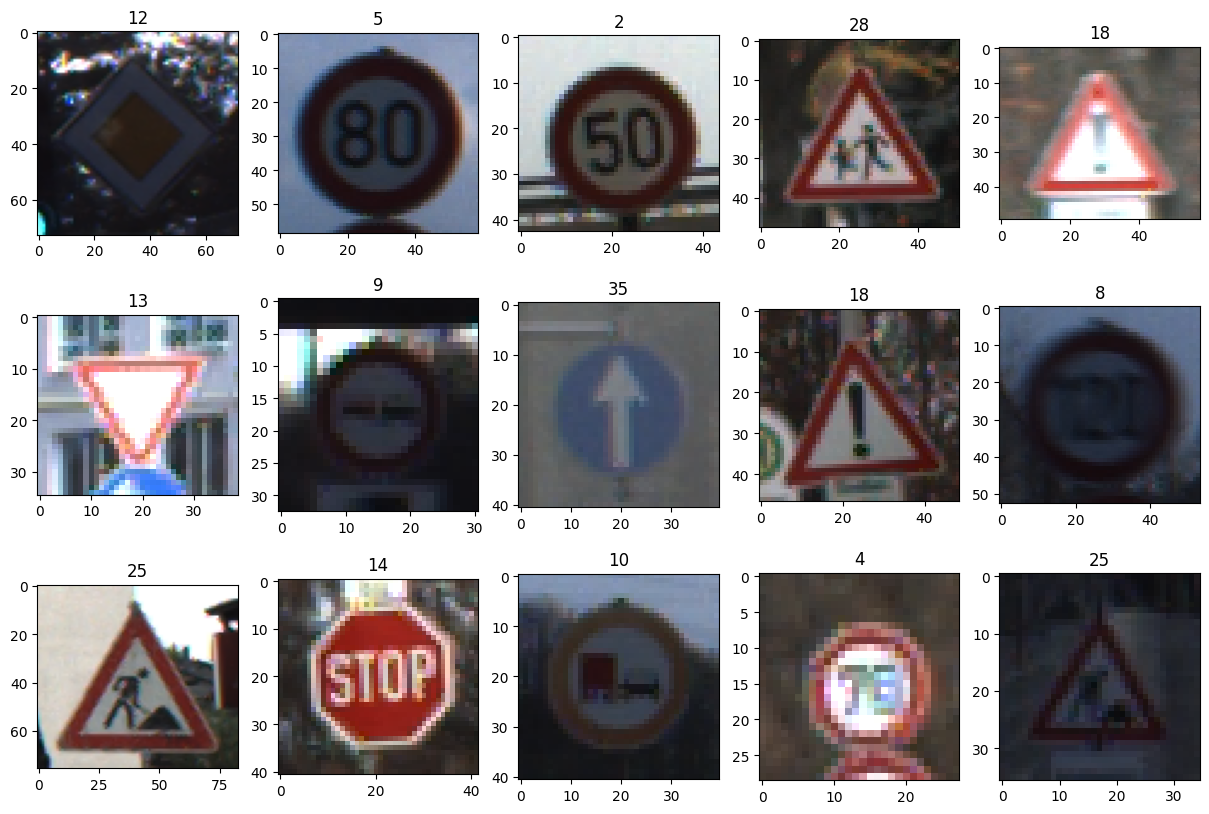

In [93]:
# Load the training labels
root = '../data/GTSRB-Training_fixed/GTSRB/Training/' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    len_prev = 0
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        # gtReader.next() # skip header
        next(gtReader)
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(int(row[7])) # the 8th column is the label
        print("Class",labels[-1],"=",len(labels)-len_prev,"images")
        len_prev = len(labels)
        gtFile.close()
    return images, labels

# print(images[1],labels[1])
# data = pd.read_csv(os.path.join(root, 'Train.csv'))

images, labels = readTrafficSigns(root)
print(len(images),len(labels))
# Number of training samples (amount of samples in data)
num_samples = len(images)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    # img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    img = images[idx]    
    # Convert image to RGB
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(labels[idx]) #plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

[ 150 1500 1500  960 1320 1260  300  960  960  990 1350  900 1410 1440
  540  420  300  750  810  150  240  240  270  360  180 1020  420  180
  360  180  300  540  180  480  300  810  270  150 1380  210  240  180
  180] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5]


(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

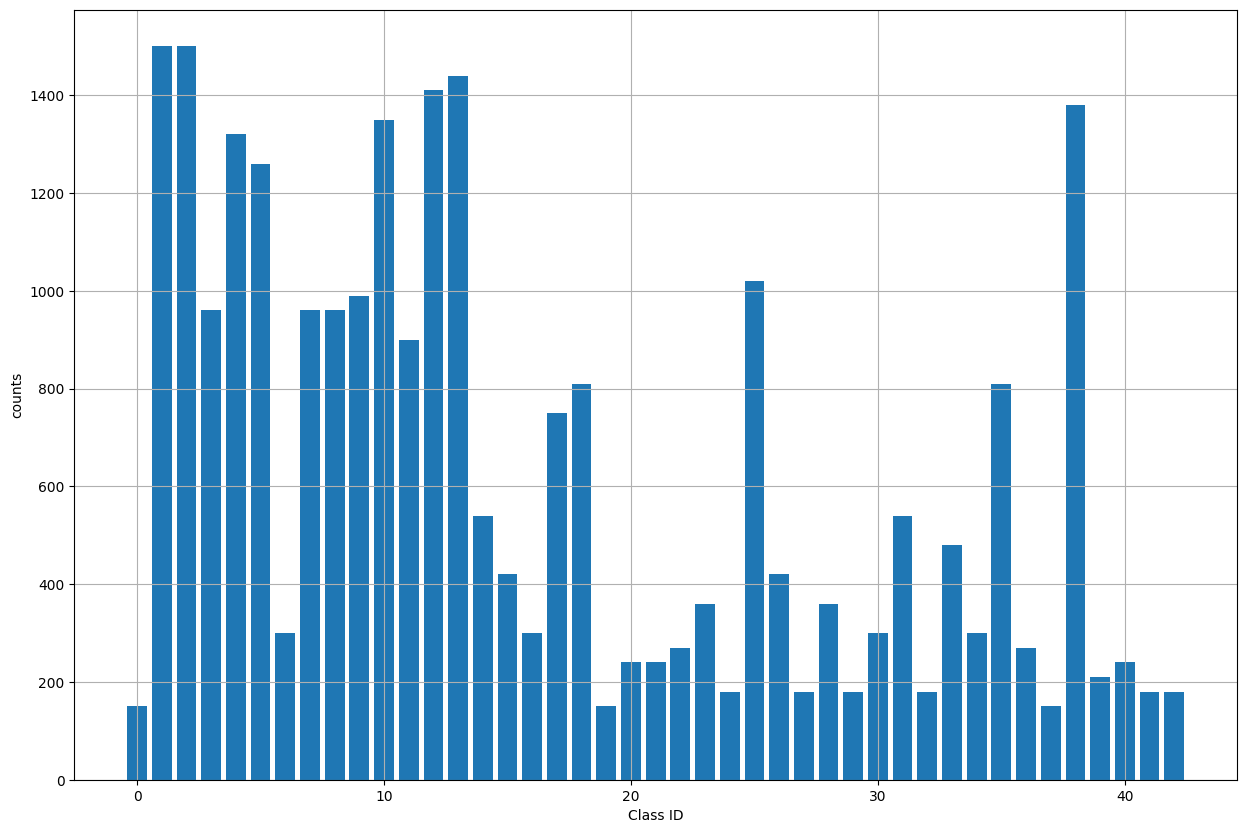

In [94]:
# Extract class identifiers
# Hint: Check the csv 
ids = labels

num_classes = 43
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(ids, bins=centers-0.5)
print(counts,bounds)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

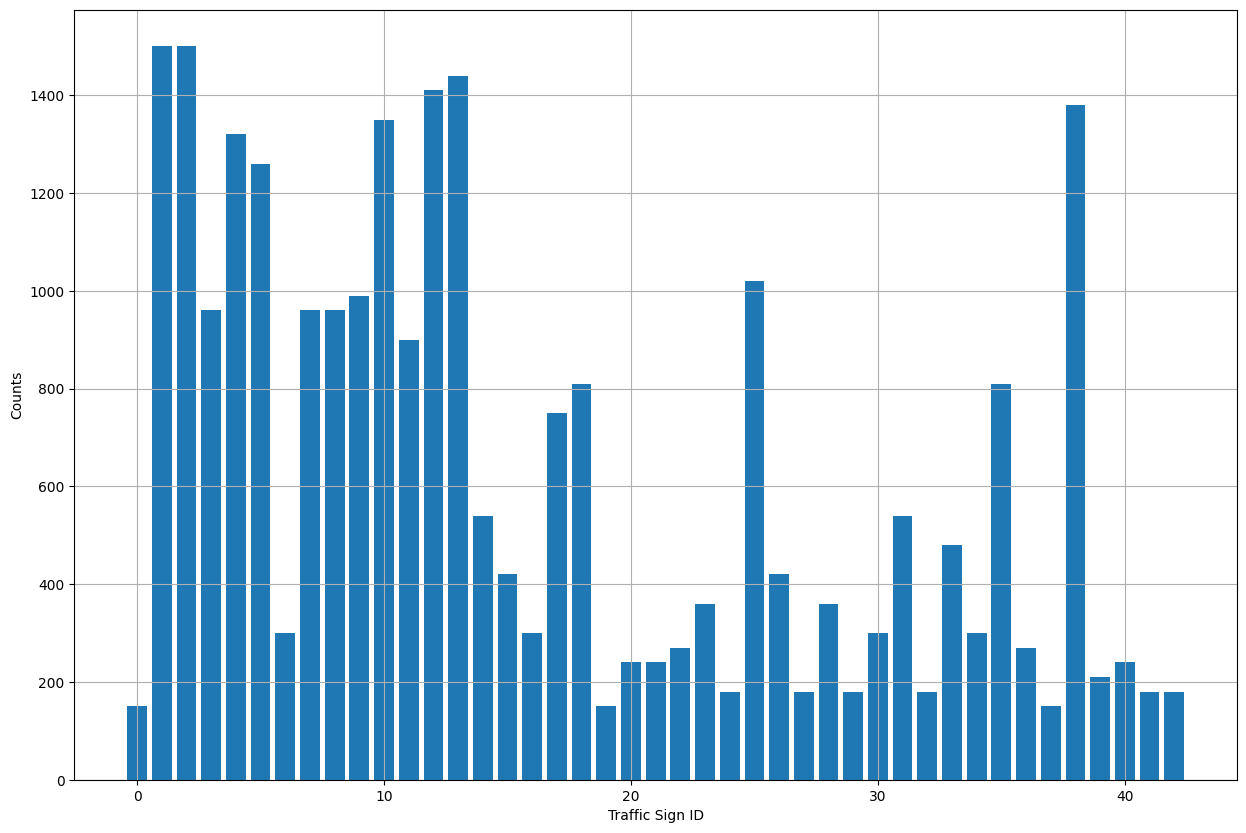

In [95]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')    

[(0, 150), (19, 150), (37, 150), (24, 180), (27, 180), (29, 180), (32, 180), (41, 180), (42, 180), (39, 210), (20, 240), (21, 240), (40, 240), (22, 270), (36, 270), (6, 300), (16, 300), (30, 300), (34, 300), (23, 360), (28, 360), (15, 420), (26, 420), (33, 480), (14, 540), (31, 540), (17, 750), (18, 810), (35, 810), (11, 900), (3, 960), (7, 960), (8, 960), (9, 990), (25, 1020), (5, 1260), (4, 1320), (10, 1350), (38, 1380), (12, 1410), (13, 1440), (1, 1500), (2, 1500)]


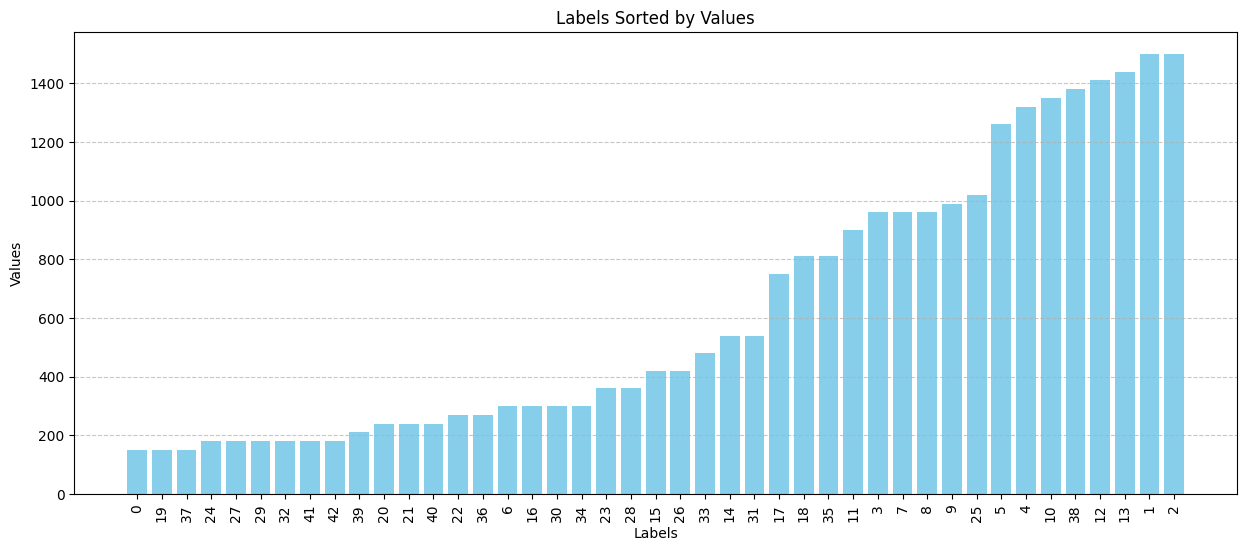

In [96]:
lbl_nums = zip(hist.keys(),hist.values())
sorted_lbl_nums = sorted(lbl_nums, key=lambda x: x[1])
print(sorted_lbl_nums)
# Unzip the sorted labels and values
labels, values = zip(*sorted_lbl_nums)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(range(len(labels)), values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Labels Sorted by Values')
plt.xticks(range(len(labels)), labels, rotation=90)  # Display all labels with rotation for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

No, the dataset is not balanced. The last graph shows that the number of images of different signs can differ by 10 times.
The datasets are probably not balanced because they are not balanced in real life either. A larger amount is due, for example, to changing the   traffic lane or speed limit. These road signs appear more often when filming.

* Are there any classes that are (significantly) over-represented or under-represeneted?

Well, for example, the classes of overtaking prohibition and warning about a sharp left turn are not sufficiently represented. And speed limit signs of 30 and 50 are (significantly) overrepresented.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

### Resolutions of dataset images

Min max resolutions are 1 938
Number of height resolutions = 172
Number of width resolutions = 179


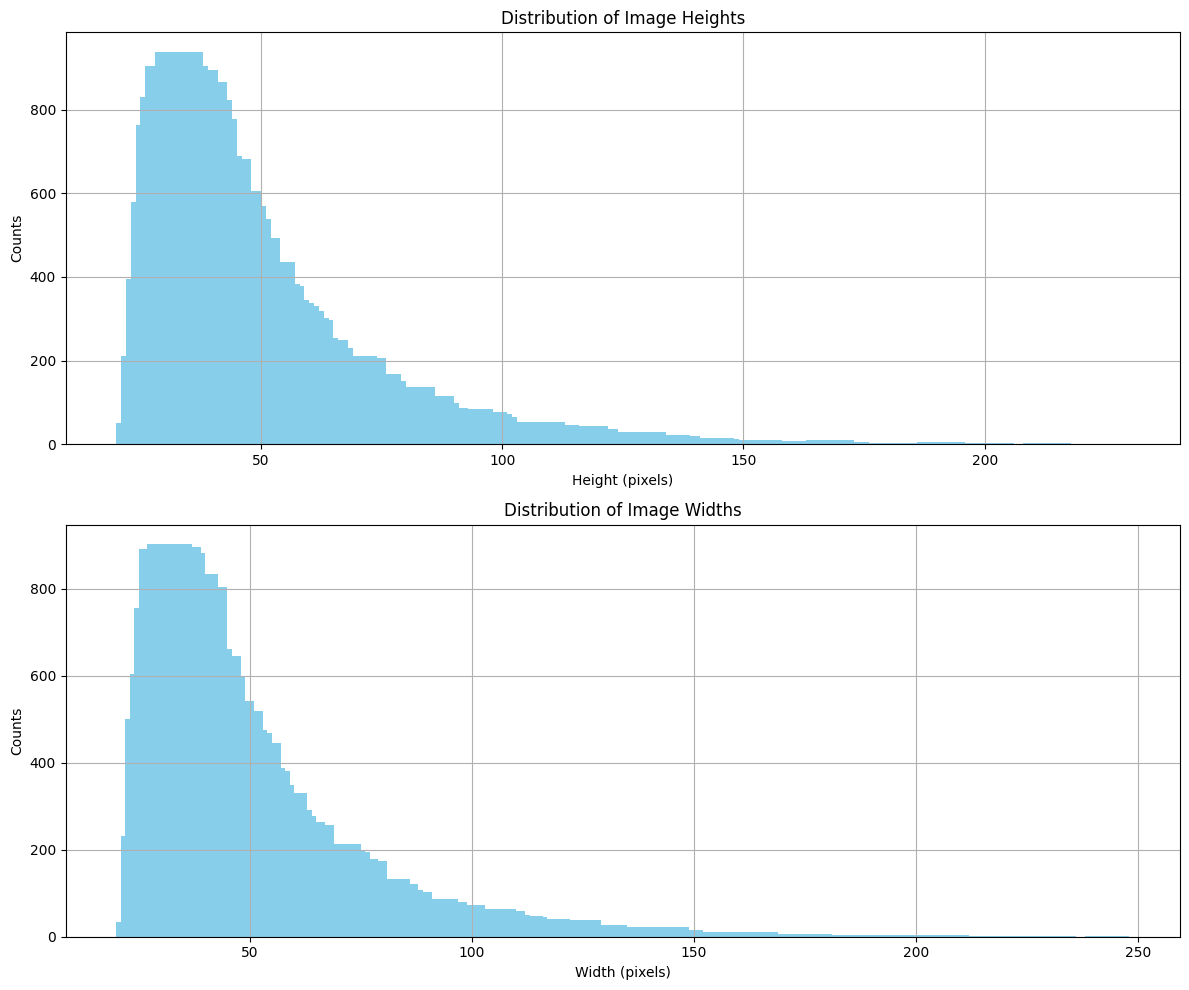

In [97]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming `images` is already defined and loaded
# Gather height and width data for each image
heights = [shp.shape[0] for shp in images]
widths = [shp.shape[1] for shp in images]

# Create histogram data for heights and widths
hist_heights = Counter(heights)
hist_widths = Counter(widths)

print("Min max resolutions are", min(hist_heights.values()), max(hist_heights.values()))
print("Number of height resolutions =", len(hist_heights.keys()))
print("Number of width resolutions =", len(hist_widths.keys()))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot height distribution
axs[0].bar(hist_heights.keys(), hist_heights.values(), width=10, color='skyblue')
axs[0].grid(True)
axs[0].set_xlabel('Height (pixels)')
axs[0].set_ylabel('Counts')
axs[0].set_title('Distribution of Image Heights')

# Plot width distribution
axs[1].bar(hist_widths.keys(), hist_widths.values(), width=10, color='skyblue')
axs[1].grid(True)
axs[1].set_xlabel('Width (pixels)')
axs[1].set_ylabel('Counts')
axs[1].set_title('Distribution of Image Widths')

# Adjust layout
plt.tight_layout()
plt.show()

        

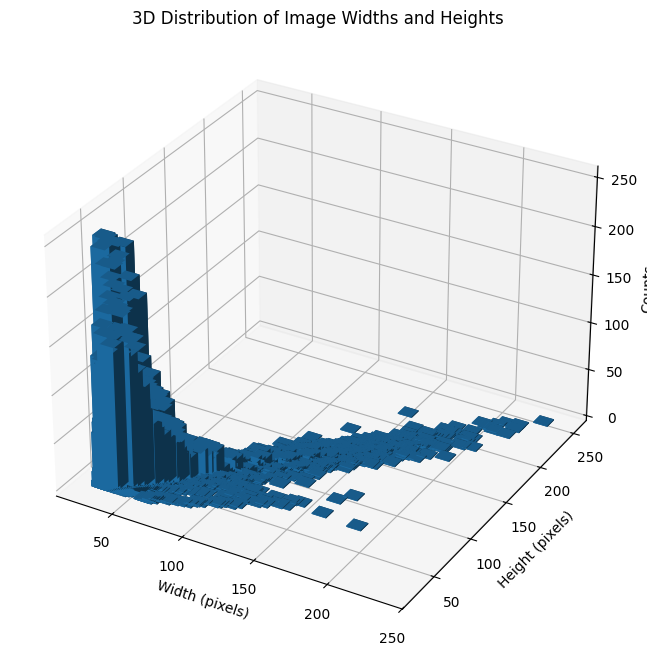

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import numpy as np

# Assuming `images` is already defined and loaded
# Gather height and width data for each image
# Create histogram data for (height, width) pairs
hist = Counter([(img.shape[0], img.shape[1]) for img in images])

# Extract data for plotting
x_vals, y_vals, z_vals = zip(*[(w, h, count) for (w, h), count in hist.items()])

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D bar plot
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)
ax.bar3d(x_vals, y_vals, np.zeros_like(z_vals), 10, 10, z_vals, shade=True)

# Labels and title
ax.set_xlabel('Width (pixels)')
ax.set_ylabel('Height (pixels)')
ax.set_zlabel('Counts')
ax.set_title('3D Distribution of Image Widths and Heights')

plt.show()

The most of pictures are squares and have resolution under 50x50 pixels

### Brigthness of dataset images

43


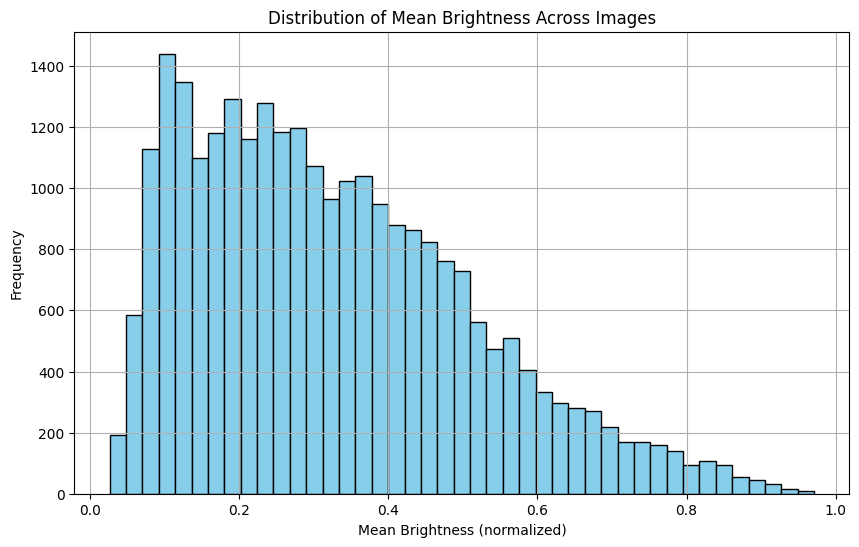

In [99]:
# Assuming `images` is a list of NumPy arrays representing the images
brs = [np.mean(image) / 255 for image in images]

# Create a histogram with bins
num_bins = len(set(labels))  # Adjust the number of bins as needed
print(num_bins)
counts, bin_edges = np.histogram(brs, bins=num_bins)

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color='skyblue', edgecolor='black')
plt.xlabel('Mean Brightness (normalized)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Brightness Across Images')
plt.grid(True)
plt.show()

In [100]:
uniq_labels = set(labels)

brigtnesses = {uniq_label: [ b for l, b in filter(lambda x: x[0] == uniq_label,zip(labels,brs))] for uniq_label in uniq_labels}
# print(brigtnesses)

for name, suma in brigtnesses.items():
    print("Class",name,"=",sum(suma)/len(suma))

Class 0 = 0.5042686499887312
Class 1 = 0.5835511982570806
Class 2 = 0.56999515855725
Class 3 = 0.5636616332356698
Class 4 = 0.5378712150338448
Class 5 = 0.5435827716503269
Class 6 = 0.48104980284124665
Class 7 = 0.5614872912127814
Class 8 = 0.5538637217339043
Class 9 = 0.541158787483082
Class 10 = 0.5435741498025235
Class 11 = 0.3050770132877976
Class 12 = 0.5656344296482705
Class 13 = 0.5719317356572258
Class 14 = 0.3829762098745315
Class 15 = 0.42870889247964916
Class 16 = 0.45756477821695213
Class 17 = 0.3562414514819284
Class 18 = 0.3491389934200392
Class 19 = 0.5073376906318082
Class 20 = 0.49299097416744475
Class 21 = 0.5101507079835252
Class 22 = 0.47968493380258087
Class 23 = 0.4317212296189903
Class 24 = 0.4947637605163467
Class 25 = 0.5419490862595471
Class 26 = 0.41176334528954267
Class 27 = 0.5124632352941176
Class 28 = 0.43020593119205663
Class 29 = 0.5013881237545313
Class 30 = 0.4591456913734761
Class 31 = 0.3793410405657931
Class 32 = 0.5013980636818007
Class 33 = 0.389

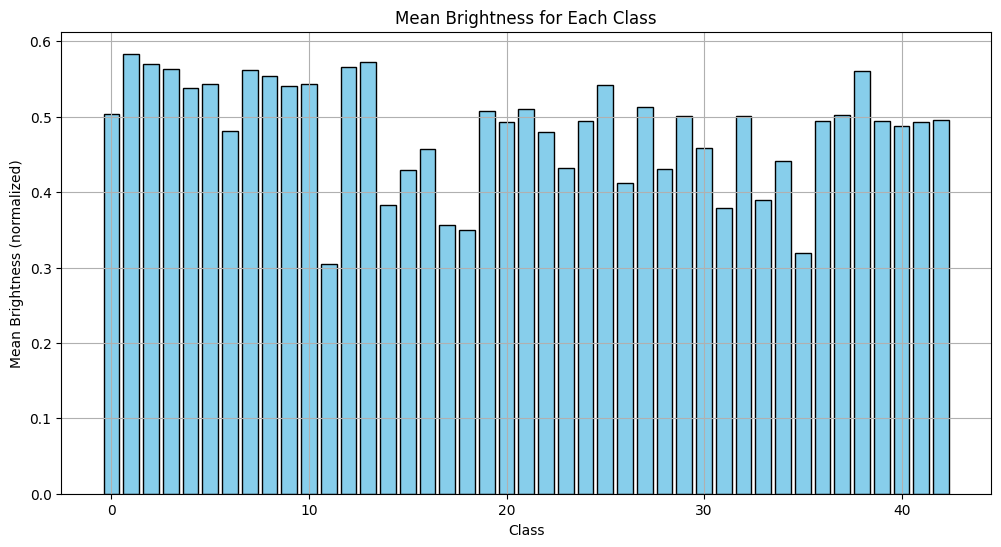

In [101]:
# Calculate the mean brightness for each unique label
brightnesses = {uniq_label: [b for l, b in filter(lambda x: x[0] == uniq_label, zip(labels, brs))] for uniq_label in uniq_labels}
mean_brightnesses = {label: sum(brightness) / len(brightness) for label, brightness in brightnesses.items()}

# Extract the labels and mean brightness values
labels_sorted = sorted(mean_brightnesses.keys())
mean_brightness_sorted = [mean_brightnesses[label] for label in labels_sorted]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels_sorted, mean_brightness_sorted, color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Mean Brightness (normalized)')
plt.title('Mean Brightness for Each Class')
plt.grid(True)
plt.show()

With brightnesses it's not good too.